In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from ctadiv import *

## Select the CTA location and time of observation

In [3]:
time='2020-02-08T04:00'
div=0.0022
name='polaris'

In [4]:
cta = CTA_Info('north',time)
cta.altaz

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-02-08T04:00:00.000


<AltAz Frame (obstime=2020-02-08T04:00:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [5]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

## Set source location

In [6]:
from astropy.coordinates import get_icrs_coordinates
star = get_icrs_coordinates(name)
star

<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>

In [7]:
print ("source:", cta.source)
cta.set_source_loc(ra=star.ra, dec=star.dec)
print ("source:", cta.source)
if cta.source.alt<=24*u.deg:
    print('\n\tWARNING: you source is not visible')

source: None
source: <SkyCoord (AltAz: obstime=2020-02-08T04:00:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.48619534, 28.29658503)>


## Get locations (sun, moon, source)

## Plot the naviation plot (Sun, Moon, and a source)

<IPython.core.display.Javascript object>


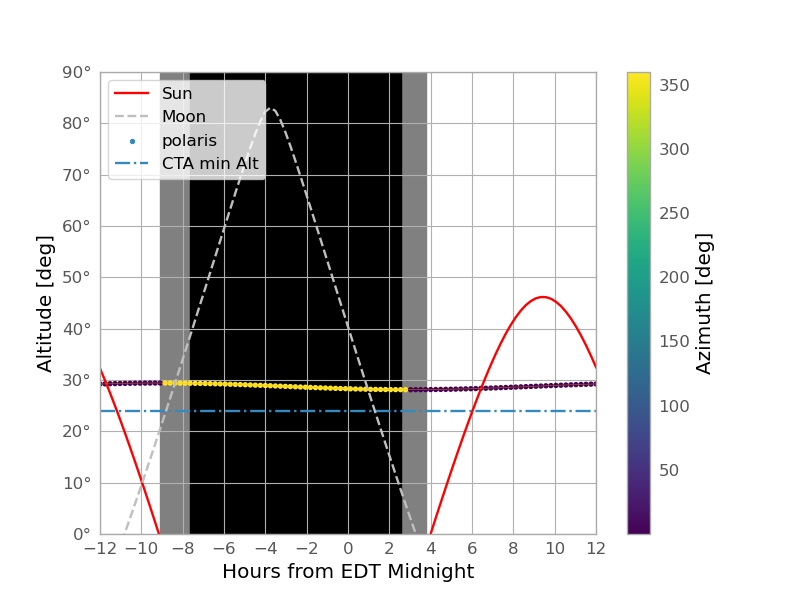

In [8]:
cta.navigation_plot(label = name)
plt.savefig(f'navigation_{name}_{time}.png')
#plt.show()

## Load array and pointing to a source

In [9]:
array =  LoadConfig("./config/layout-3AL4M15-5.txt", frame=cta, pointing2src=True)

#array.set_pointing_coord(star.ra, star.dec)
array.table.units='deg'
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-70.04,-7.23,54.0,359.486,28.297,61.703,28.000,2.150,14.536,0.880,0.008,0.474,34.63
2,-34.37,110.98,43.0,359.486,28.297,61.703,28.000,2.150,14.536,0.880,0.008,0.474,94.18
3,76.18,95.34,39.7,359.486,28.297,61.703,28.000,2.150,14.536,0.880,0.008,0.474,166.98
4,31.81,-19.7,43.0,359.486,28.297,61.703,28.000,2.150,14.536,0.880,0.008,0.474,117.20
5,-210.65,50.51,61.3,359.486,28.297,61.703,16.000,3.850,46.707,0.880,0.008,0.474,137.60
6,-179.06,223.02,42.1,359.486,28.297,61.703,16.000,3.850,46.707,0.880,0.008,0.474,222.09
7,27.96,243.56,23.2,359.486,28.297,61.703,16.000,3.850,46.707,0.880,0.008,0.474,241.86
8,176.27,127.9,19.3,359.486,28.297,61.703,16.000,3.850,46.707,0.880,0.008,0.474,273.21


## Activate the divergent pointing mode

In [10]:
array.divergent_pointing(div) #0.01453   0.0043

In [13]:
array.hFoV(m_cut=3)

<Quantity 52.75091285 deg2>

In [15]:
array.hFoV(m_cut=3,return_multiplicity=True)

(<Quantity 52.75091285 deg2>, 13.516695445169455, 26.734056510392726)

<IPython.core.display.Javascript object>


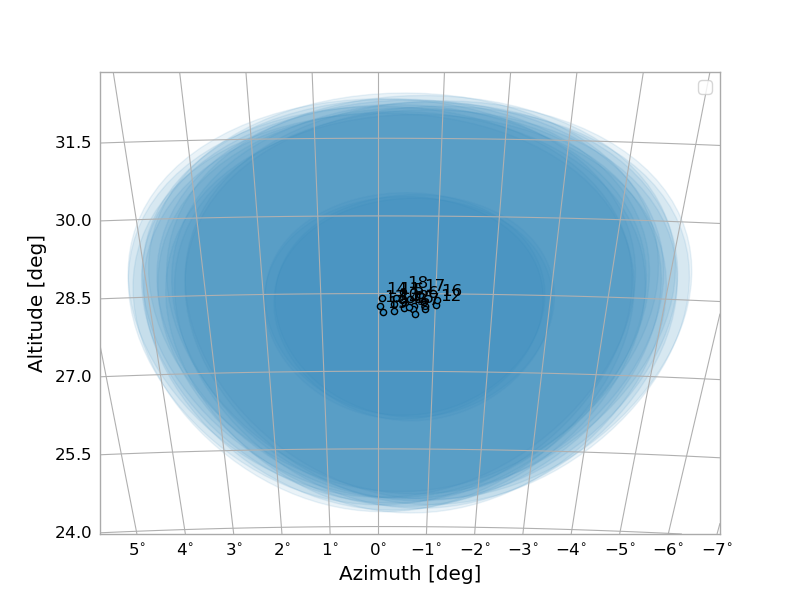

No handles with labels found to put in legend.


In [12]:
array.skymap_polar()

In [13]:
array.pointing

{'az': <Quantity 359.48619534 deg>,
 'alt': <Quantity 28.29658503 deg>,
 'ra': <Quantity 37.95456067 deg>,
 'dec': <Quantity 89.26410897 deg>}

<IPython.core.display.Javascript object>


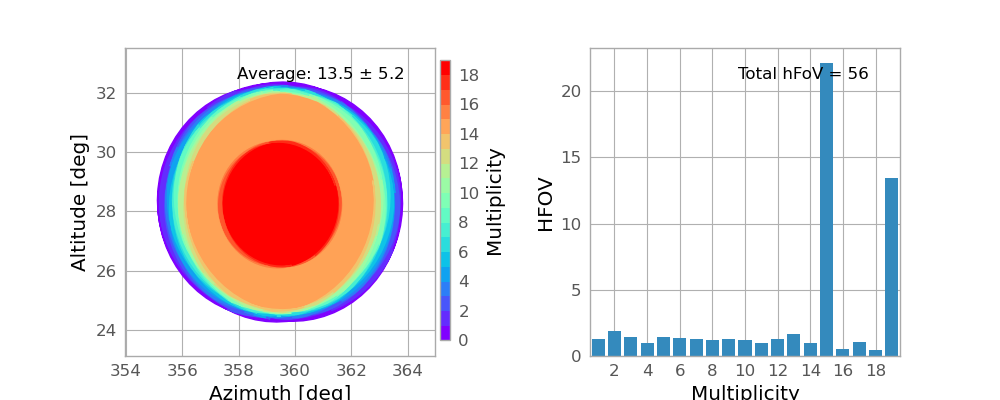

In [17]:
array.multiplicity_plot()

In [15]:
initial_pointing_dir=array.get_pointing_coord(icrs=True)

In [16]:
pointing_start_altaz=array.get_pointing_coord(icrs=False)

In [17]:
star.transform_to(cta.altaz)

<SkyCoord (AltAz: obstime=2020-02-08T04:00:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.48619534, 28.29658503)>

## Shifting the observation time and check how it change

In [18]:
array.update_frame(time = time, verbose=True)
array.update_frame(delta_t = 30*u.min, verbose=True)

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-02-08T04:00:00.000
Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-02-08T04:30:00.000


In [19]:
array.hFoV(m_cut=3)

<Quantity 51.61912658 deg2>

In [20]:
final_pointing_dir=array.get_pointing_coord(icrs=True)
final_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(35.09561794, 89.28688195), (43.19555391, 89.17939889),
     (39.38641533, 89.13362555), (31.48470354, 89.22869542),
     (44.34385261, 89.32489188), (54.41585731, 89.1479956 ),
     (49.08554058, 89.02863598), (38.79906637, 89.043031  ),
     (19.9525121 , 89.21933883), (21.58427175, 89.35155803),
     (27.13528357, 89.44565061), (58.67531582, 88.95459854),
     ( 3.32248507, 89.3358844 ), ( 4.65969393, 89.48317939),
     (37.28772111, 89.20472118), (63.82530595, 89.00397131),
     (58.80226374, 89.27713331), (44.02683097, 89.49498443),
     ( 7.55224812, 89.206325  )]>

In [22]:
final_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(35.09561794, 89.28688195), (43.19555391, 89.17939889),
     (39.38641533, 89.13362555), (31.48470354, 89.22869542),
     (44.34385261, 89.32489188), (54.41585731, 89.1479956 ),
     (49.08554058, 89.02863598), (38.79906637, 89.043031  ),
     (19.9525121 , 89.21933883), (21.58427175, 89.35155803),
     (27.13528357, 89.44565061), (58.67531582, 88.95459854),
     ( 3.32248507, 89.3358844 ), ( 4.65969393, 89.48317939),
     (37.28772111, 89.20472118), (63.82530595, 89.00397131),
     (58.80226374, 89.27713331), (44.02683097, 89.49498443),
     ( 7.55224812, 89.206325  )]>

In [23]:
array.pointing

{'az': <Quantity 359.55967944 deg>,
 'alt': <Quantity 28.24161389 deg>,
 'ra': <Quantity 37.95456067 deg>,
 'dec': <Quantity 89.26410897 deg>}

<IPython.core.display.Javascript object>


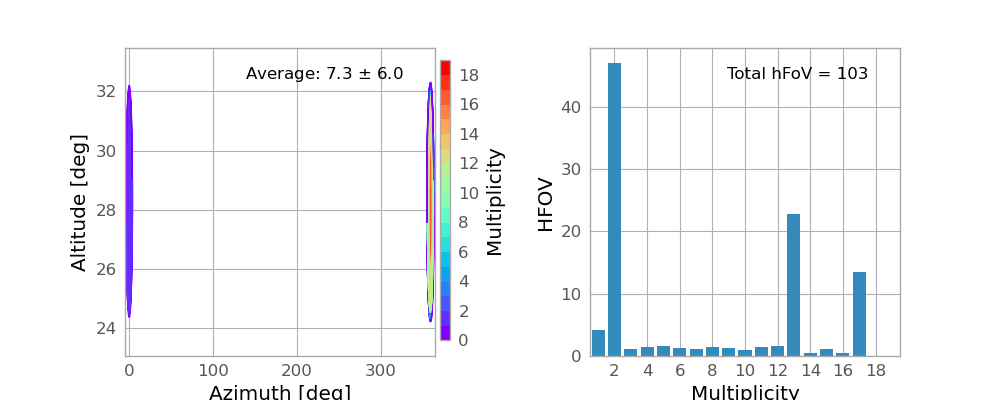

In [24]:
array.multiplicity_plot()

In [25]:
cta.altaz

<AltAz Frame (obstime=2020-02-08T04:30:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [26]:
final_pointing=initial_pointing_dir.transform_to(cta.altaz)
final_pointing

<SkyCoord (AltAz: obstime=2020-02-08T04:30:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(3.59607371e+02, 28.24940569), (3.59445323e+02, 28.19618005),
     (3.59479392e+02, 28.13017991), (3.59636954e+02, 28.17934073),
     (3.59509936e+02, 28.33096519), (3.59271221e+02, 28.26145189),
     (3.59267634e+02, 28.1150127 ), (3.59447106e+02, 28.04363278),
     (3.59808730e+02, 28.14051619), (3.59801236e+02, 28.27430439),
     (3.59753625e+02, 28.37681072), (3.59066063e+02, 28.16338294),
     (3.84101639e-02, 28.26683756), (3.59991787e+02, 28.40923685),
     (3.59543037e+02, 28.18333985), (3.59033999e+02, 28.26388551),
     (3.59317195e+02, 28.39808124), (3.59607669e+02, 28.47778768),
     (1.89430216e-03, 28.1302749 )]>

## Get parameters (hFoV, alt, and m) as a function of time

In [28]:
array.update_frame(time = time)

fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
hFoV = [fov.value]
mAve = [m_ave]
t = [0]
alt = [array.pointing["alt"].value]
for i in range(24):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
    hFoV.append(fov.value)
    mAve.append(m_ave)
    alt.append(array.pointing["alt"].value)

<IPython.core.display.Javascript object>


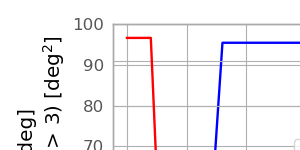

In [29]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view (m > 3) [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)
plt.savefig(f'evolution_{name}_{time}_{div}.png')

In [30]:
star

<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>

In [ ]:
diff=[]
for i in range(len(initial_pointing_dir)):
    diff.append([initial_pointing_dir[i].ra-final_pointing_dir[i].ra,initial_pointing_dir[i].dec-final_pointing_dir[i].dec])

In [ ]:
diff